In [1]:
# coding: utf-8

# In[1]:


# -*- coding: utf-8 -*-

# 逻辑回归代码

import numpy as np

class LogisticRegression(object):

    def __init__(self, learning_rate=0.1, max_iter=100, seed=None):
        self.seed = seed
        self.lr = learning_rate
        self.max_iter = max_iter

    def fit(self, x, y):
        np.random.seed(self.seed)
        self.w = np.random.normal(loc=0.0, scale=1.0, size=x.shape[1])
        self.b = np.random.normal(loc=0.0, scale=1.0)
        self.x = x
        self.y = y
        for i in range(self.max_iter):
            self._update_step()
            # print('loss: \t{}'.format(self.loss()))
            # print('score: \t{}'.format(self.score()))
            # print('w: \t{}'.format(self.w))
            # print('b: \t{}'.format(self.b))

    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def _f(self, x, w, b):
        z = x.dot(w) + b
        return self._sigmoid(z)

    def predict_proba(self, x=None):
        if x is None:
            x = self.x
        y_pred = self._f(x, self.w, self.b)
        return y_pred

    def predict(self, x=None):
        if x is None:
            x = self.x
        y_pred_proba = self._f(x, self.w, self.b)
        y_pred = np.array([0 if y_pred_proba[i] < 0.5 else 1 for i in range(len(y_pred_proba))])
        return y_pred

    def score(self, y_true=None, y_pred=None):
        if y_true is None or y_pred is None:
            y_true = self.y
            y_pred = self.predict()
        acc = np.mean([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))])
        return acc

    def loss(self, y_true=None, y_pred_proba=None):
        if y_true is None or y_pred_proba is None:
            y_true = self.y
            y_pred_proba = self.predict_proba()
        return np.mean(-1.0 * (y_true * np.log(y_pred_proba) + (1.0 - y_true) * np.log(1.0 - y_pred_proba)))

    def _calc_gradient(self):
        y_pred = self.predict()
        d_w = (y_pred - self.y).dot(self.x) / len(self.y)
        d_b = np.mean(y_pred - self.y)
        return d_w, d_b

    def _update_step(self):
        d_w, d_b = self._calc_gradient()
        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b
        return self.w, self.b

In [2]:
# In[2]:


# -*- coding: utf-8 -*-

import numpy as np

# 生成数据
def generate_data(seed):
    np.random.seed(seed)
    data_size_1 = 300
    x1_1 = np.random.normal(loc=5.0, scale=1.0, size=data_size_1)
    x2_1 = np.random.normal(loc=4.0, scale=1.0, size=data_size_1)
    y_1 = [0 for _ in range(data_size_1)]
    data_size_2 = 400
    x1_2 = np.random.normal(loc=10.0, scale=2.0, size=data_size_2)
    x2_2 = np.random.normal(loc=8.0, scale=2.0, size=data_size_2)
    y_2 = [1 for _ in range(data_size_2)]
    x1 = np.concatenate((x1_1, x1_2), axis=0)
    x2 = np.concatenate((x2_1, x2_2), axis=0)
    
    
    x = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))
    y = np.concatenate((y_1, y_2), axis=0)
    data_size_all = data_size_1+data_size_2
    shuffled_index = np.random.permutation(data_size_all)
    x = x[shuffled_index]
    y = y[shuffled_index]
    return x, y

# 将数据在70%处分为训练和测试组
def train_test_split(x, y):
    split_index = int(len(y)*0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]
    return x_train, y_train, x_test, y_test


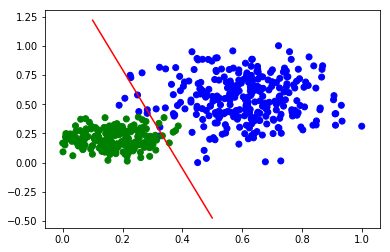

0.9620853080568721
0.6320643606193965


In [4]:
# In[4]:


# -*- coding: utf-8 -*-

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
#import data_helper

#from logistic_regression import *

# data generation

x, y = generate_data(seed=272)
x_train, y_train, x_test, y_test = train_test_split(x, y)

# visualize data
# plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='.')
# plt.show()
# plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='.')
# plt.show()

# data normalization
x_train = (x_train - np.min(x_train, axis=0)) / (np.max(x_train, axis=0) - np.min(x_train, axis=0))
x_test = (x_test - np.min(x_test, axis=0)) / (np.max(x_test, axis=0) - np.min(x_test, axis=0))

# Logistic regression classifier
clf = LogisticRegression(learning_rate=0.1, max_iter=500, seed=272)
clf.fit(x_train, y_train)

# plot the result
split_boundary_func = lambda x: (-clf.b - clf.w[0] * x) / clf.w[1]
xx = np.arange(0.1, 0.6, 0.1)
cValue = ['g','b'] 
plt.scatter(x_train[:,0], x_train[:,1], c=[cValue[i] for i in y_train], marker='o')
plt.plot(xx, split_boundary_func(xx), c='red')
plt.show()

# loss on test set
y_test_pred = clf.predict(x_test)
y_test_pred_proba = clf.predict_proba(x_test)
print(clf.score(y_test, y_test_pred))
print(clf.loss(y_test, y_test_pred_proba))
# print(y_test_pred_proba)


In [ ]:
# 撸代码能力还是不行，本次任务主要学习了参考代码。。。